## 7th May 2025
1. 타이타닉 데이터 분석
2. 기타  visualisation 예제



당시 타이타닉에 탑승한 승객 중 64.8%가 남성 (총 577 명)이었고 여성의 경우 35.2% (총 314명) 이었음. 또한 전체 승객의 55.1%는 3등석에 (총 491명), 24.2%는 1등석에 (총 216명), 20.7%는 2등석에 탑승하였음 (184명).  그러나 생존자의 수 및 생존율을 분석한 결과 1등석의 생존률이 가장 높았고, 여성이 남성의 경우보다 더 높은 것을 확인하였음.

| 생존자 수 (생존률) | 남성 | 여성 |
| --- | --- | --- |
| 1등석 | 45명 (37%) | 91명 (97%) |
| 2등석 | 17명  (16%) | 70명 (92%) |
| 3등석 | 47명  (14%) | 72명 (50%) |

또한 이와 별도로 상관계수를 분석한 결과 성별(`Sex`)은 생존(`Survived`)과 가장 강한 관계를 가지며, 객실 등급(`Pclass`)도 의미 있는 상관이 있으나, 성별보다는 약하였음.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('seaborn-v0_8')
sns.set(font_scale=2.5)

import missingno as msmo

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:

from google.colab import files

# 파일 업로드
uploaded = files.upload()

Saving titanic_train.csv to titanic_train.csv


In [3]:
df = pd.read_csv('titanic_train.csv')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


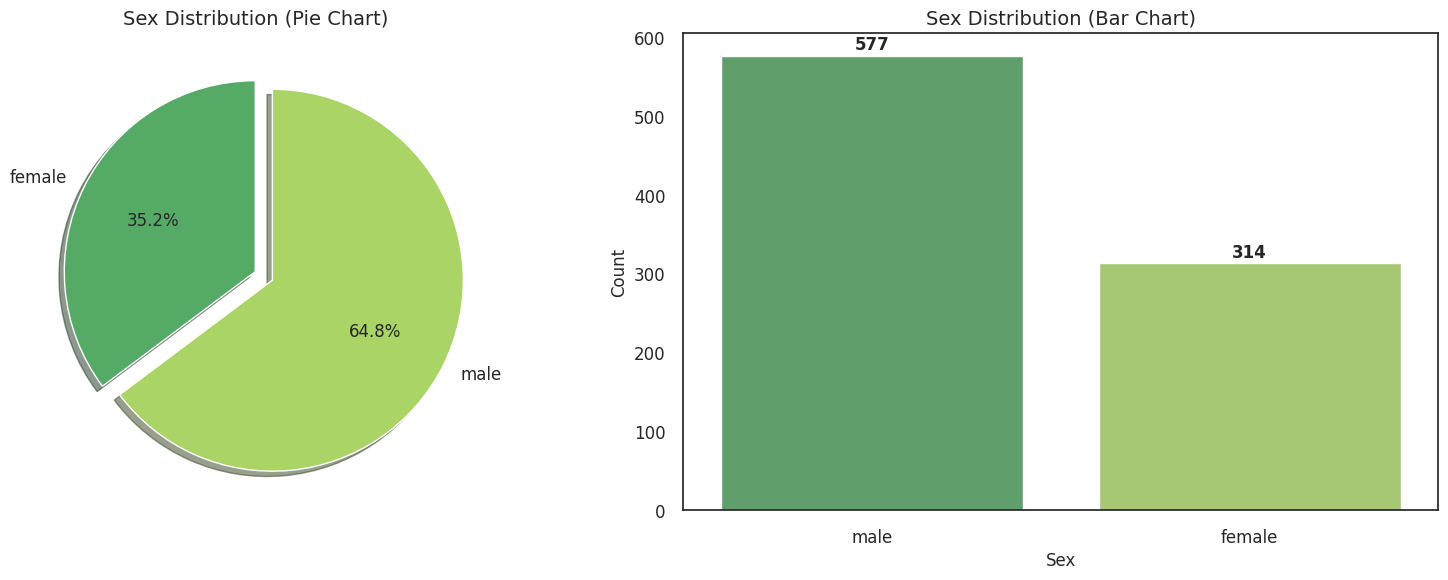

In [45]:
# 동일한 스타일로 성별(Sex) 분포 시각화 구성
f, ax = plt.subplots(1, 2, figsize=(16, 6))

# 첫 번째 subplot: 성별 파이차트
df['sex'].value_counts().sort_index().plot.pie(
    explode=[0, 0.1],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True,
    colors=sns.color_palette('summer', 2),
    startangle=90,
    textprops={'fontsize': 12}
)
ax[0].set_title('Sex Distribution (Pie Chart)', fontsize=14)
ax[0].set_ylabel('')

# 두 번째 subplot: 성별 카운트 플롯
sns.countplot(x='sex', data=df, ax=ax[1], palette='summer')
ax[1].set_title('Sex Distribution (Bar Chart)', fontsize=14)
ax[1].set_xlabel('Sex', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].tick_params(labelsize=12)

# 막대 위에 인원 수 라벨 추가
for p in ax[1].patches:
    count = int(p.get_height())
    ax[1].text(
        p.get_x() + p.get_width() / 2,
        count + 2,
        f'{count}',
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

plt.tight_layout()
plt.show()


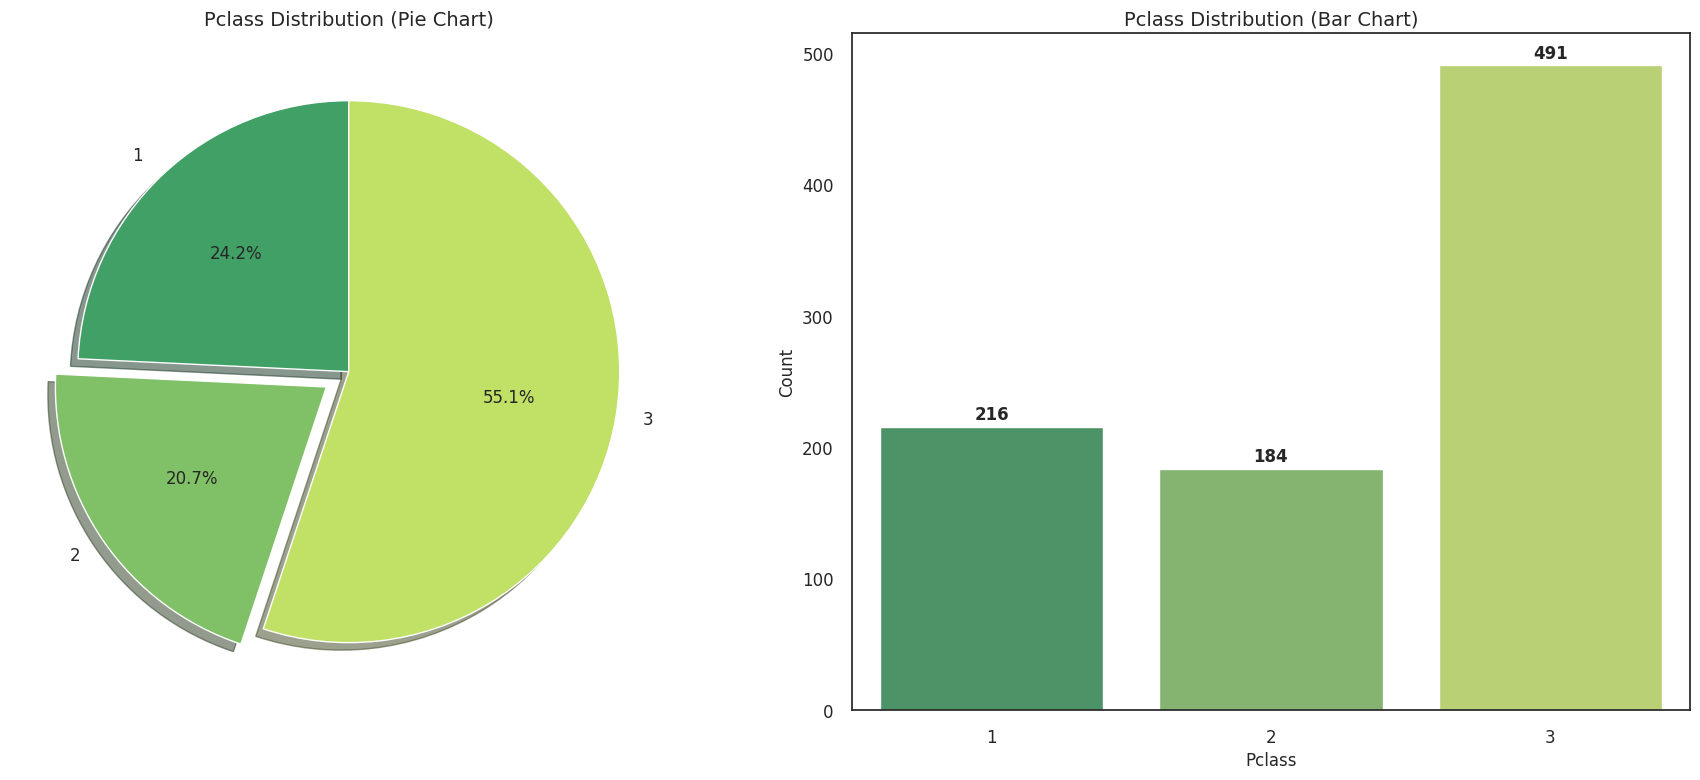

In [44]:
# 시각화 스타일을 기존과 동일하게 적용
f, ax = plt.subplots(1, 2, figsize=(18, 8))

# 첫 번째 subplot: Pclass를 파이차트로 표시
df['pclass'].value_counts().sort_index().plot.pie(
    explode=[0, 0.1, 0],
    autopct='%1.1f%%',
    ax=ax[0],
    shadow=True,
    colors=sns.color_palette('summer', 3),
    startangle=90,
    textprops={'fontsize': 12}
)
ax[0].set_title('Pclass Distribution (Pie Chart)', fontsize=14)
ax[0].set_ylabel('')

# 두 번째 subplot: Pclass를 countplot으로 표시
sns.countplot(x='pclass', data=df, ax=ax[1], palette='summer')
ax[1].set_title('Pclass Distribution (Bar Chart)', fontsize=14)
ax[1].set_xlabel('Pclass', fontsize=12)
ax[1].set_ylabel('Count', fontsize=12)
ax[1].tick_params(labelsize=12)

# 막대 위에 총 인원 수 라벨 추가
for p in ax[1].patches:
    count = int(p.get_height())
    ax[1].text(
        p.get_x() + p.get_width() / 2,
        count + 2,
        f'{count}',
        ha='center', va='bottom', fontsize=12, fontweight='bold'
    )

plt.tight_layout()
plt.show()


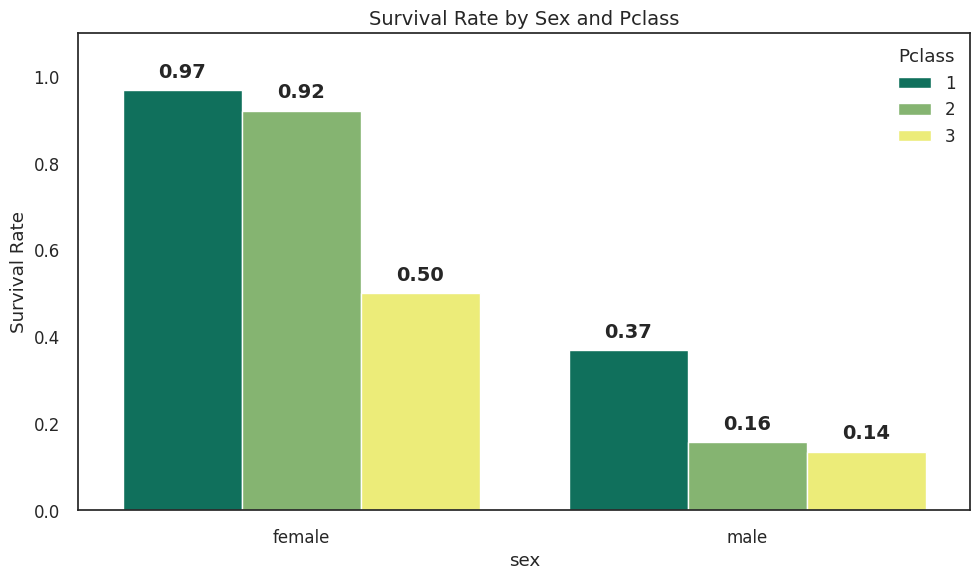

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Titanic 예시 데이터셋 로드
df = sns.load_dataset("titanic")

# 성별과 Pclass별 생존률 계산
grouped = df.groupby(['sex', 'pclass'])['survived'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='sex', y='survived', hue='pclass', data=grouped, palette='summer')

# 막대 위에 생존률 라벨 표시
for p in ax.patches:
    height = p.get_height()
    if height > 0:
        ax.text(
            p.get_x() + p.get_width() / 2,
            height + 0.02,
            f'{height:.2f}',
            ha='center', va='bottom',
            fontsize=14,
            fontweight='bold'
        )

plt.title('Survival Rate by Sex and Pclass', fontsize=14)
plt.ylabel('Survival Rate')
plt.ylim(0, 1.1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Pclass')
plt.tight_layout()
plt.show()


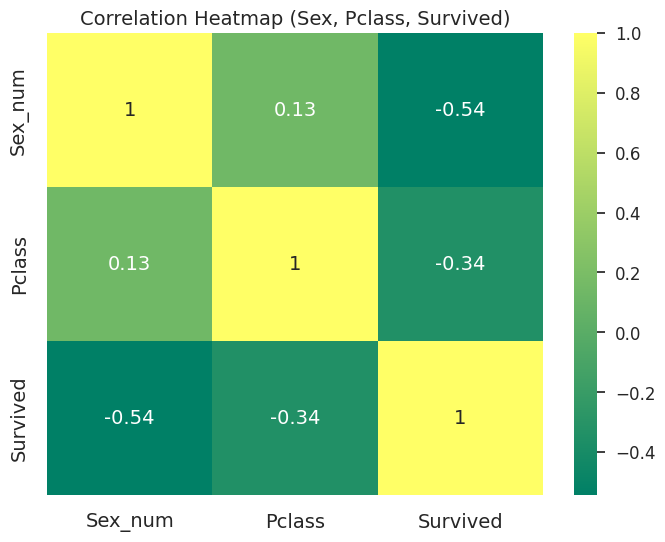

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# 'Sex'를 수치형으로 변환 (예: male=1, female=0)
df['Sex_num'] = df['Sex'].map({'male': 1, 'female': 0})

# 필요한 컬럼만 선택해서 상관계수 계산
corr = df[['Sex_num', 'Pclass', 'Survived']].corr()

# Heatmap 그리기
plt.figure(figsize=(8, 6))
ax = sns.heatmap(corr, annot=True, cmap='summer', annot_kws={"size": 14})

# 제목 및 축 글자 크기 설정
plt.title('Correlation Heatmap (Sex, Pclass, Survived)', fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()


## 기타 visualisation

from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os

- 그래프 데이터

csv_path = os.getenv("HOME") + "/aiffel/data_visualization/data/AMZN.csv"
data = pd.read_csv(csv_path, index_col=0, parse_dates=True)
price = data['Close']

- 축 그리기 및 좌표축 설정

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01', '2020-03-01'])

- 주석달기

important_data = [(datetime(2019, 6, 3), "Low Price"), (datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10), # 주석을 달 좌표(x,y)
    xytext=(d, price.asof(d)+100), # 주석 텍스트가 위치할 좌표(x,y)
    arrowprops=dict(facecolor='red')) # 화살표 추가 및 색 설정

- 그리드, 타이틀 달기

plt.grid()
ax.set_title('StockPrice')

- 보여주기

plt.show()

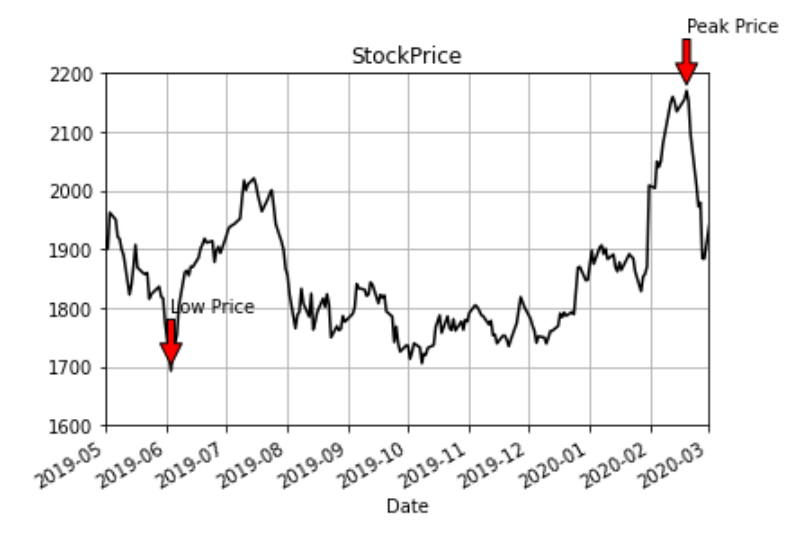

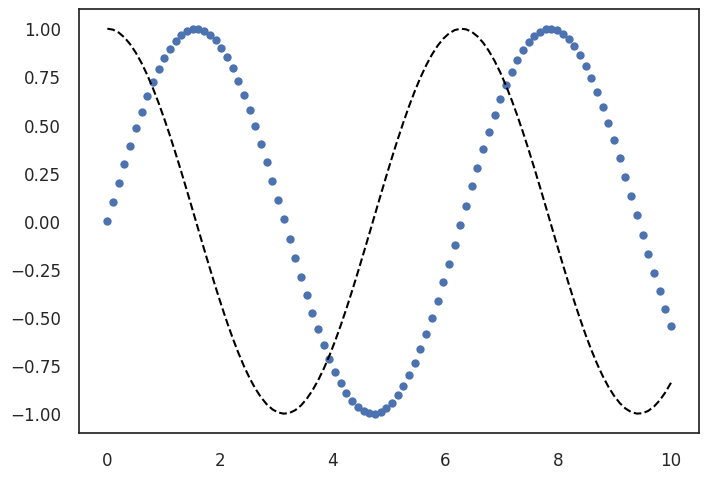

In [46]:
import numpy as np

# 0에서 10까지 균등한 간격으로 100개의 숫자를 만들라는 뜻입니다.
x = np.linspace(0, 10, 100)

plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x), '--', color='black')
plt.show()

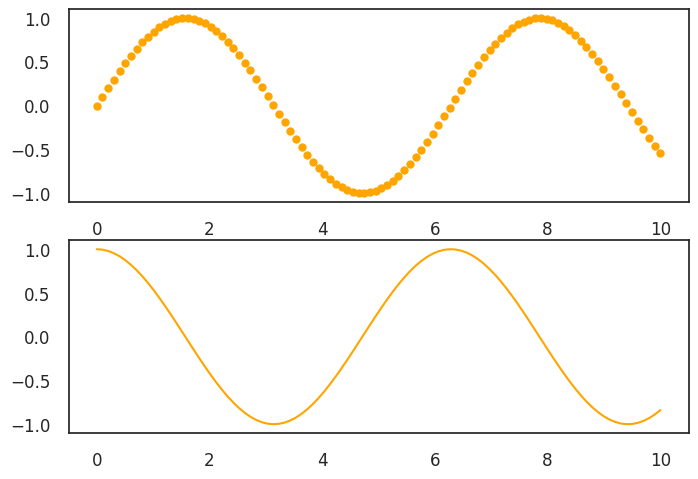

In [47]:
x = np.linspace(0, 10, 100)

plt.subplot(2,1,1)
plt.plot(x, np.sin(x), 'o', color='orange')

plt.subplot(2,1,2)
plt.plot(x, np.cos(x), 'orange')
plt.show()

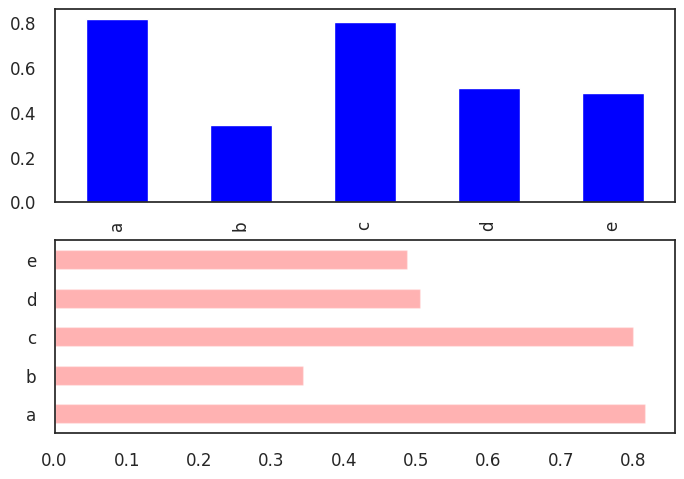

In [48]:
ig, axes = plt.subplots(2, 1)
data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='blue', alpha=1)
data.plot(kind='barh', ax=axes[1], color='red', alpha=0.3)
plt.show()

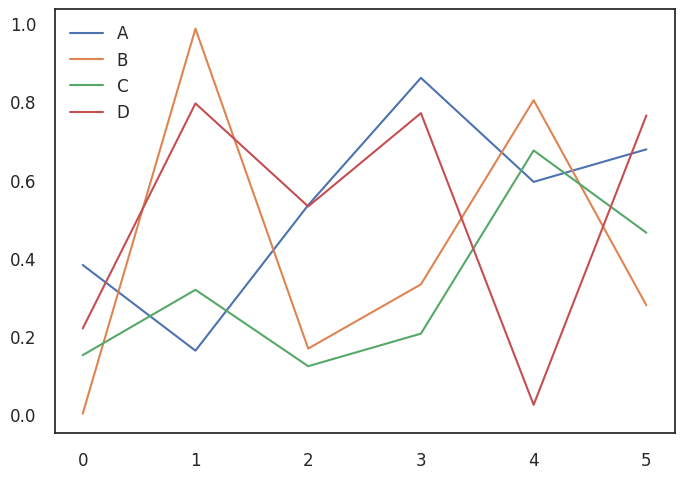

In [49]:
df = pd.DataFrame(np.random.rand(6,4), columns=pd.Index(['A','B','C','D']))
df.plot(kind='line')
plt.show()

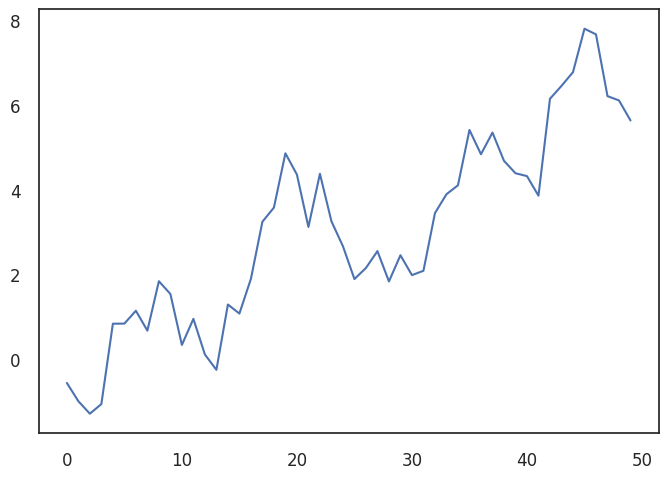

In [50]:
# np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수입니다.
# cumsum()은 누적합을 구하는 함수입니다.
plt.plot(np.random.randn(50).cumsum())
plt.show()

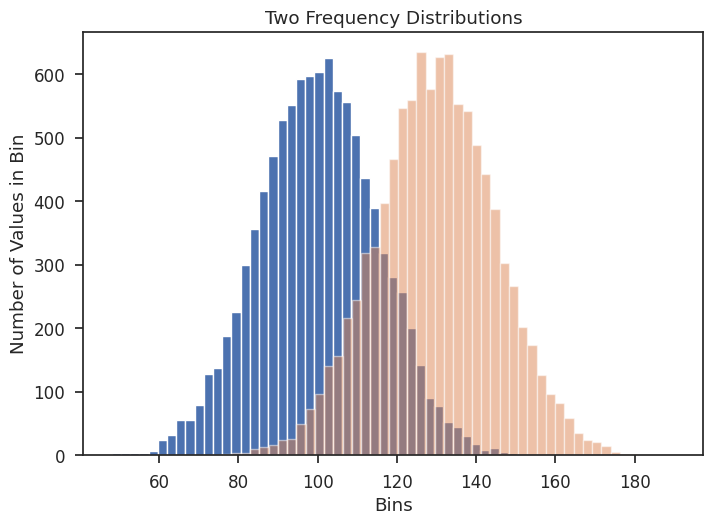

In [51]:
#그래프 데이터
mu1, mu2, sigma = 100, 130, 15
x1 = mu1 + sigma*np.random.randn(10000)
x2 = mu2 + sigma*np.random.randn(10000)

# 축 그리기
fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

# 그래프 그리기
patches = ax1.hist(x1, bins=50, density=False)  # bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.
patches = ax1.hist(x2, bins=50, density=False, alpha=0.5)
ax1.xaxis.set_ticks_position('bottom')  # x축의 눈금을 아래 표시
ax1.yaxis.set_ticks_position('left')  # y축의 눈금을 왼쪽에 표시

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
ax1.set_title('Two Frequency Distributions')

# 보여주기
plt.show()